In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Step 1: Load the image
img = cv2.imread(r"C:\Users\bbuser\Downloads\Typical_New_Zealand_scenic_walk_view.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB for display


In [12]:
# -----------------------
# Contrast Enhancement using Histogram Equalization
# -----------------------
# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# Apply histogram equalization on V channel
v_eq = cv2.equalizeHist(v)

# Merge channels back
hsv_eq = cv2.merge([h, s, v_eq])
contrast_enhanced = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)

# -----------------------
# Saturation Enhancement
# -----------------------
hsv_sat = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h2, s2, v2 = cv2.split(hsv_sat)

# Increase saturation (factor 1.5)
s2 = np.clip(s2 * 1.5, 0, 255).astype(np.uint8)

# Merge back
hsv_sat_enhanced = cv2.merge([h2, s2, v2])
saturation_enhanced = cv2.cvtColor(hsv_sat_enhanced, cv2.COLOR_HSV2RGB)


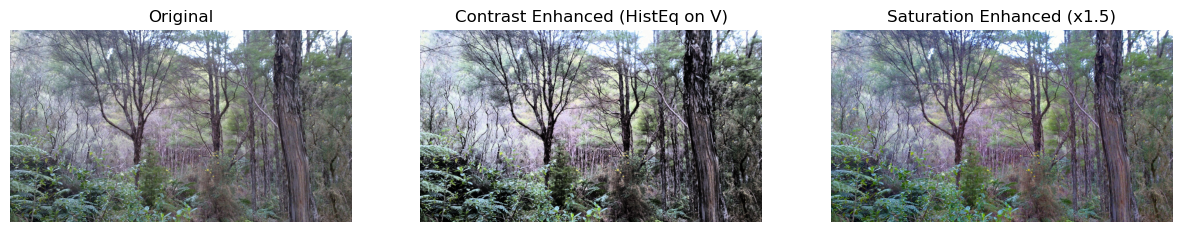

True

In [13]:
# -----------------------
# Display Results
# -----------------------
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(contrast_enhanced)
plt.title("Contrast Enhanced (HistEq on V)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(saturation_enhanced)
plt.title("Saturation Enhanced (x1.5)")
plt.axis("off")

plt.show()

# -----------------------
# Save the processed images
# -----------------------
cv2.imwrite("landscape_contrast_enhanced.jpg", cv2.cvtColor(contrast_enhanced, cv2.COLOR_RGB2BGR))
cv2.imwrite("landscape_saturation_enhanced.jpg", cv2.cvtColor(saturation_enhanced, cv2.COLOR_RGB2BGR))